# Telecom Churn Case Study

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

### Import Libraries

In [370]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, log_loss

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## Read & Understand DataSet

In [371]:
df = pd.read_csv('train.csv')
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [372]:
df['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [373]:
print((df['churn_probability'].value_counts()/len(df))*100)

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64


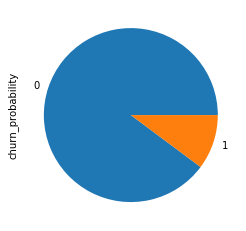

In [374]:
((df['churn_probability'].value_counts()/len(df))*100).plot(kind="pie")
plt.show()

#### Observation

Class Imbalance with less data for churned customers where ~90% are no churn and ~10% churn customers

### Removal of columns which are not useful for analysis

id and circle_id are ID columns and hence can be removed.

Date columns are removed.

loc_ic_t2o_mou, std_og_t2o_mou, loc_og_t2o_mou - Have only single type of value hence removed.

In [375]:
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'
            ]

In [376]:
df = df.drop(id_cols + date_cols, axis=1)

In [377]:
df = df.drop(['loc_ic_t2o_mou',
 'std_og_t2o_mou',
 'loc_og_t2o_mou'], axis=1)

## Missing Value Analysis & Treatment

In [378]:
# Function to get the missing value counts and percentages for columns
def checkMissingPerc():
    mis_val = df.isnull().sum()
    mis_val_percentage = 100*mis_val/len(df)
    missing_val = pd.concat([mis_val,mis_val_percentage],axis =1)
    missing_val = missing_val.rename(columns = {0:'Missing Values',1:'% of Total Values'})
    missing_val = missing_val.loc[missing_val['Missing Values']>0]
    missing_val = missing_val.sort_values('Missing Values',ascending = False)
    return missing_val

In [379]:
mv = checkMissingPerc()
mv

,Missing Values,% of Total Values
count_rech_2g_6,52431,74.902499
arpu_2g_6,52431,74.902499
total_rech_data_6,52431,74.902499
fb_user_6,52431,74.902499
arpu_3g_6,52431,74.902499
count_rech_3g_6,52431,74.902499
max_rech_data_6,52431,74.902499
night_pck_user_6,52431,74.902499
av_rech_amt_data_6,52431,74.902499
count_rech_3g_7,52134,74.478207


#### Observation

The missing values in recharge columns are not actully missing, rather it means the customers have not recharged.

Hence these should be imputed with 0 signifying no recharge.

In [380]:
rechCols = list(filter(lambda x : 'rech' in x, df.columns))
rechCols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

#### Imputing Recharge columns missing values with 0

In [381]:
df[rechCols] = df[rechCols].apply(lambda x: x.fillna(0))

In [382]:
mv = checkMissingPerc()
mv.head(30)

,Missing Values,% of Total Values
night_pck_user_6,52431,74.902499
fb_user_6,52431,74.902499
arpu_2g_6,52431,74.902499
arpu_3g_6,52431,74.902499
fb_user_7,52134,74.478207
night_pck_user_7,52134,74.478207
arpu_2g_7,52134,74.478207
arpu_3g_7,52134,74.478207
night_pck_user_8,51582,73.689624
arpu_2g_8,51582,73.689624


#### Category columns missing values will be imputed with -1 as new category.

In [383]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]

In [384]:
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

#### Remove columns with 70% missing values

In [385]:
initial_cols = df.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(df.apply(lambda column: True if column.isnull().sum()/df.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,arpu_6,True
1,arpu_7,True
2,arpu_8,True
3,onnet_mou_6,True
4,onnet_mou_7,True
5,onnet_mou_8,True
6,offnet_mou_6,True
7,offnet_mou_7,True
8,offnet_mou_8,True
9,roam_ic_mou_6,True


In [386]:
# drop columns
df = df.loc[:, include_cols]

dropped_cols = df.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-6 columns dropped.


In [387]:
mv = checkMissingPerc()
mv.head(200)

,Missing Values,% of Total Values
ic_others_8,3703,5.290076
og_others_8,3703,5.290076
std_og_t2t_mou_8,3703,5.290076
loc_ic_t2f_mou_8,3703,5.290076
loc_ic_t2t_mou_8,3703,5.290076
loc_og_mou_8,3703,5.290076
loc_ic_mou_8,3703,5.290076
std_og_t2f_mou_8,3703,5.290076
loc_og_t2c_mou_8,3703,5.290076
std_ic_t2t_mou_8,3703,5.290076


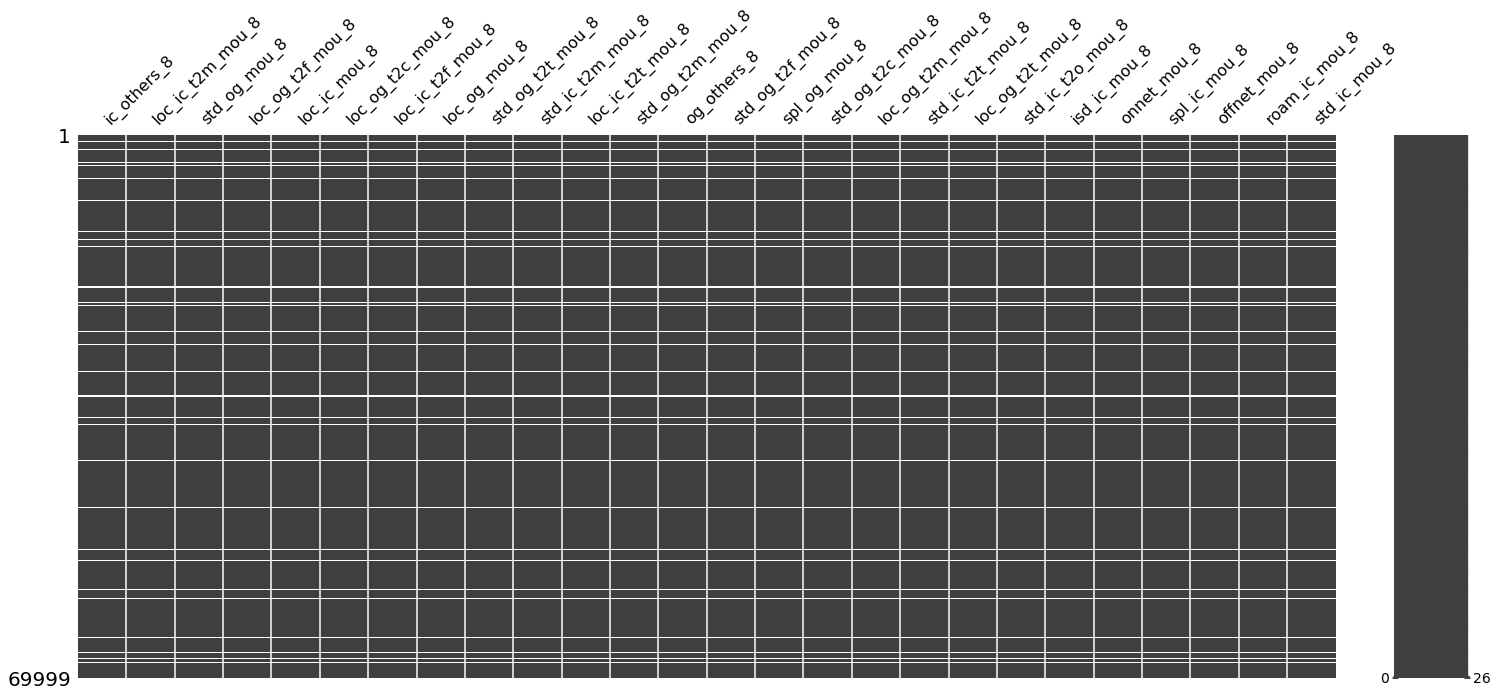

In [388]:
import missingno as msno 
msno.matrix(df[[
    'ic_others_8',
 'loc_ic_t2m_mou_8',
 'std_og_mou_8',
 'loc_og_t2f_mou_8',
 'loc_ic_mou_8',
 'loc_og_t2c_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'std_og_t2m_mou_8',
 'og_others_8',
 'std_og_t2f_mou_8',
 'spl_og_mou_8',
 'std_og_t2c_mou_8',
 'loc_og_t2m_mou_8',
 'std_ic_t2t_mou_8',
 'loc_og_t2t_mou_8',
 'std_ic_t2o_mou_8',
 'isd_ic_mou_8',
 'onnet_mou_8',
 'spl_ic_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'std_ic_mou_8']])

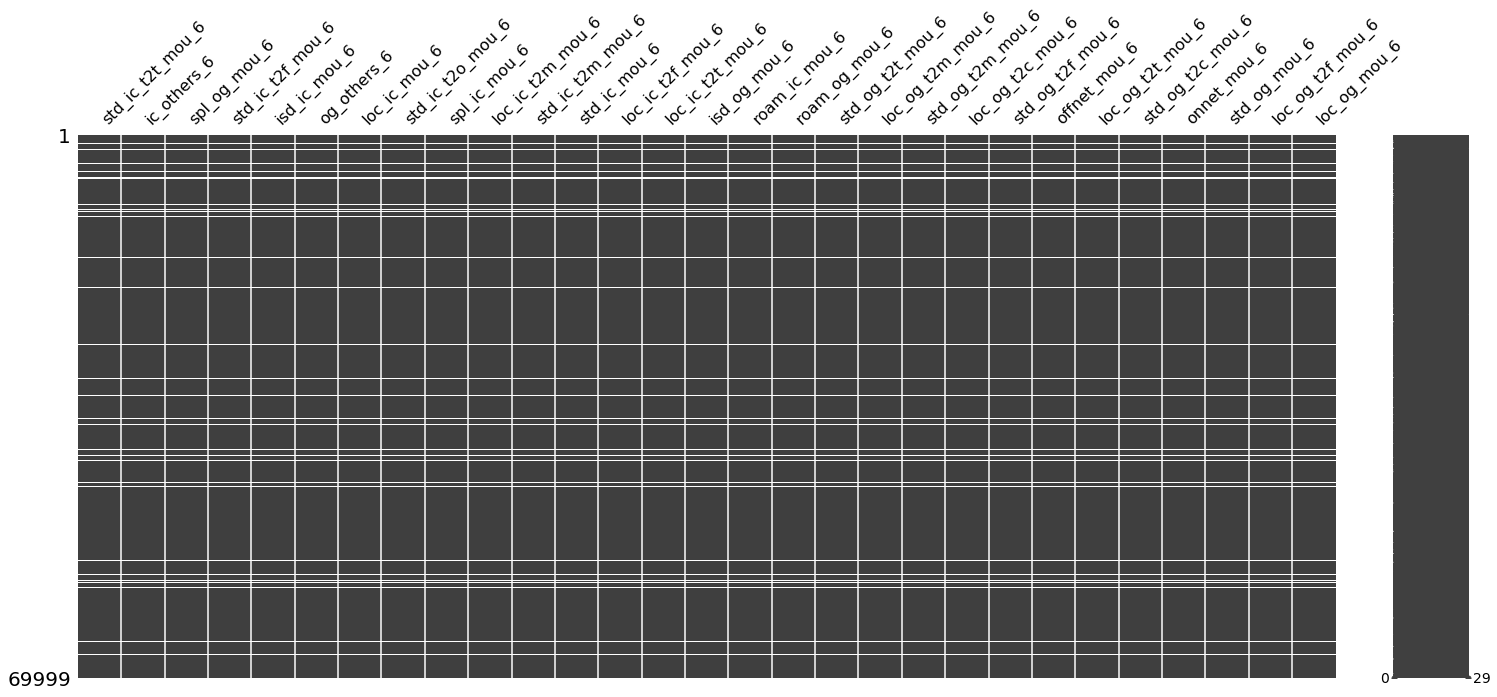

In [389]:
msno.matrix(df[['std_ic_t2t_mou_6',
 'ic_others_6',
 'spl_og_mou_6',
 'std_ic_t2f_mou_6',
 'isd_ic_mou_6',
 'og_others_6',
 'loc_ic_mou_6',
 'std_ic_t2o_mou_6',
 'spl_ic_mou_6',
 'loc_ic_t2m_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2t_mou_6',
 'isd_og_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'std_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'std_og_t2m_mou_6',
 'loc_og_t2c_mou_6',
 'std_og_t2f_mou_6',
 'offnet_mou_6',
 'loc_og_t2t_mou_6',
 'std_og_t2c_mou_6',
 'onnet_mou_6',
 'std_og_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_mou_6',
 ]])

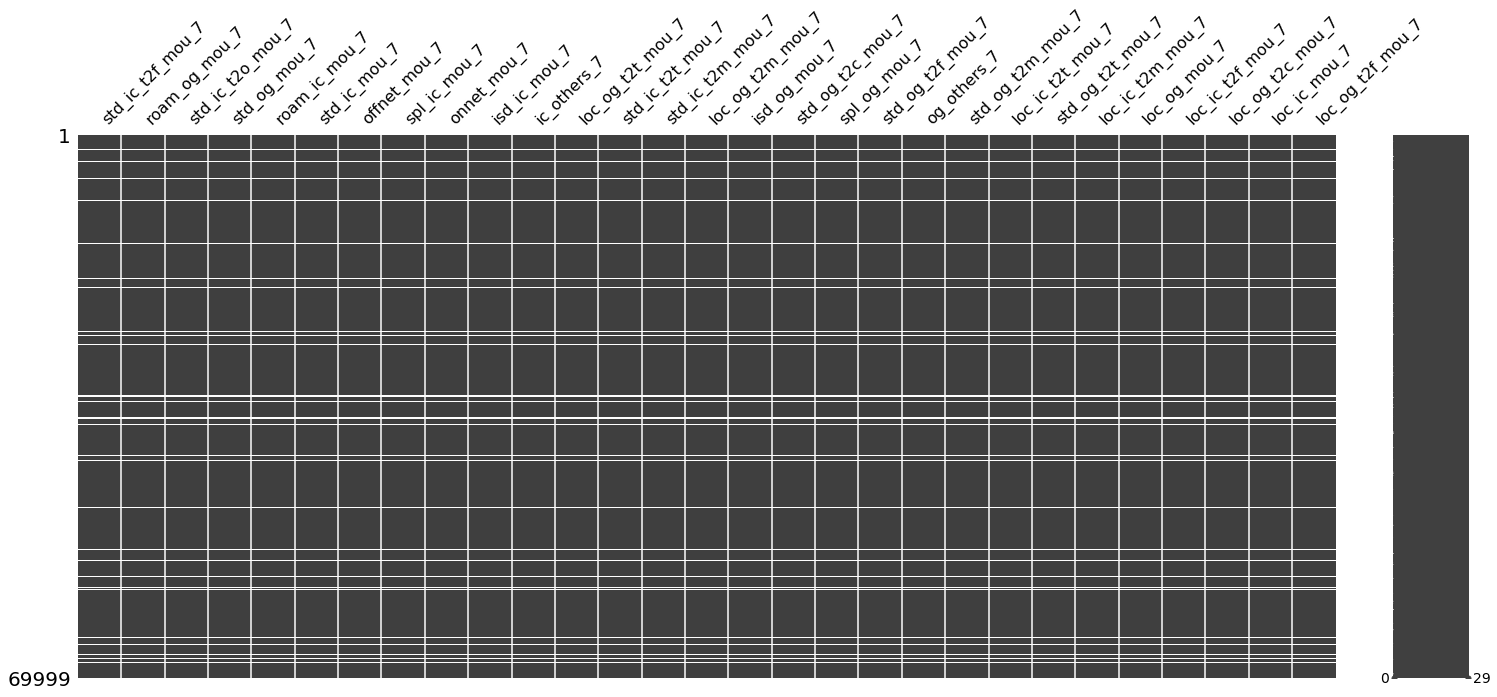

In [390]:
msno.matrix(df[['std_ic_t2f_mou_7',
 'roam_og_mou_7',
 'std_ic_t2o_mou_7',
 'std_og_mou_7',
 'roam_ic_mou_7',
 'std_ic_mou_7',
 'offnet_mou_7',
 'spl_ic_mou_7',
 'onnet_mou_7',
 'isd_ic_mou_7',
 'ic_others_7',
 'loc_og_t2t_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'loc_og_t2m_mou_7',
 'isd_og_mou_7',
 'std_og_t2c_mou_7',
 'spl_og_mou_7',
 'std_og_t2f_mou_7',
 'og_others_7',
 'std_og_t2m_mou_7',
 'loc_ic_t2t_mou_7',
 'std_og_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_og_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_ic_mou_7',
 'loc_og_t2f_mou_7']])

#### Observation

We see three sets of columns one belonging to each month which have common missing values as shown in the plots above.

The corresponding total mou are 0 hence the individuals should be imputed with 0.

In [391]:
df.fillna(value=0,inplace=True)

In [392]:
mv = checkMissingPerc()
mv.head(200)

,Missing Values,% of Total Values


#### There are no more missing values in the data

# Derived Features

Dervied new difference features for each of the features - The difference between 8th month and the average of 6th and 7th month.

In [393]:
df['arpu_diff'] = df.arpu_8 - ((df.arpu_6 + df.arpu_7)/2)

df['onnet_mou_diff'] = df.onnet_mou_8 - ((df.onnet_mou_6 + df.onnet_mou_7)/2)

df['offnet_mou_diff'] = df.offnet_mou_8 - ((df.offnet_mou_6 + df.offnet_mou_7)/2)

df['roam_ic_mou_diff'] = df.roam_ic_mou_8 - ((df.roam_ic_mou_6 + df.roam_ic_mou_7)/2)

df['roam_og_mou_diff'] = df.roam_og_mou_8 - ((df.roam_og_mou_6 + df.roam_og_mou_7)/2)

df['loc_og_mou_diff'] = df.loc_og_mou_8 - ((df.loc_og_mou_6 + df.loc_og_mou_7)/2)

df['std_og_mou_diff'] = df.std_og_mou_8 - ((df.std_og_mou_6 + df.std_og_mou_7)/2)

df['isd_og_mou_diff'] = df.isd_og_mou_8 - ((df.isd_og_mou_6 + df.isd_og_mou_7)/2)

df['spl_og_mou_diff'] = df.spl_og_mou_8 - ((df.spl_og_mou_6 + df.spl_og_mou_7)/2)

df['total_og_mou_diff'] = df.total_og_mou_8 - ((df.total_og_mou_6 + df.total_og_mou_7)/2)

df['loc_ic_mou_diff'] = df.loc_ic_mou_8 - ((df.loc_ic_mou_6 + df.loc_ic_mou_7)/2)

df['std_ic_mou_diff'] = df.std_ic_mou_8 - ((df.std_ic_mou_6 + df.std_ic_mou_7)/2)

df['isd_ic_mou_diff'] = df.isd_ic_mou_8 - ((df.isd_ic_mou_6 + df.isd_ic_mou_7)/2)

df['spl_ic_mou_diff'] = df.spl_ic_mou_8 - ((df.spl_ic_mou_6 + df.spl_ic_mou_7)/2)

df['total_ic_mou_diff'] = df.total_ic_mou_8 - ((df.total_ic_mou_6 + df.total_ic_mou_7)/2)

df['total_rech_num_diff'] = df.total_rech_num_8 - ((df.total_rech_num_6 + df.total_rech_num_7)/2)

df['total_rech_amt_diff'] = df.total_rech_amt_8 - ((df.total_rech_amt_6 + df.total_rech_amt_7)/2)

df['max_rech_amt_diff'] = df.max_rech_amt_8 - ((df.max_rech_amt_6 + df.max_rech_amt_7)/2)

df['total_rech_data_diff'] = df.total_rech_data_8 - ((df.total_rech_data_6 + df.total_rech_data_7)/2)

df['max_rech_data_diff'] = df.max_rech_data_8 - ((df.max_rech_data_6 + df.max_rech_data_7)/2)

df['av_rech_amt_data_diff'] = df.av_rech_amt_data_8 - ((df.av_rech_amt_data_6 + df.av_rech_amt_data_7)/2)

df['vol_2g_mb_diff'] = df.vol_2g_mb_8 - ((df.vol_2g_mb_6 + df.vol_2g_mb_7)/2)

df['vol_3g_mb_diff'] = df.vol_3g_mb_8 - ((df.vol_3g_mb_6 + df.vol_3g_mb_7)/2)

In [394]:
#Derived tenure column
df['tenure'] = (df['aon']/30).round(0)

#Drop original column
df.drop('aon',axis=1, inplace=True)

#### Seggregate the columns into Numeric and Categorical

In [395]:
num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#Numeric cols:%d\n#Category cols:%d" % (len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(num_cols) + len(cat_cols) == df.shape[1])

#Numeric cols:169
#Category cols:6
True


In [396]:
catColList = []
for col in df.columns:
    if df[col].dtypes == 'object':
        catColList.append(col)
print(catColList)

[]


## Visualization - Univariate & Bivariate Analysis

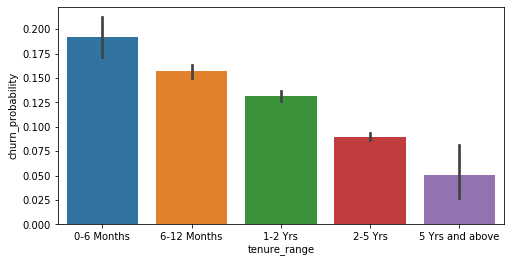

In [397]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df['tenure_range'] = pd.cut(df['tenure'], tn_range, labels=tn_label)

plt.figure(figsize=[8,4])
sns.barplot(x='tenure_range',y='churn_probability', data=df)
plt.show()

#### Observation

There is high probability of churn during initial 6 months

Text(0.5, 1, 'Features Correlating with Churn variable')

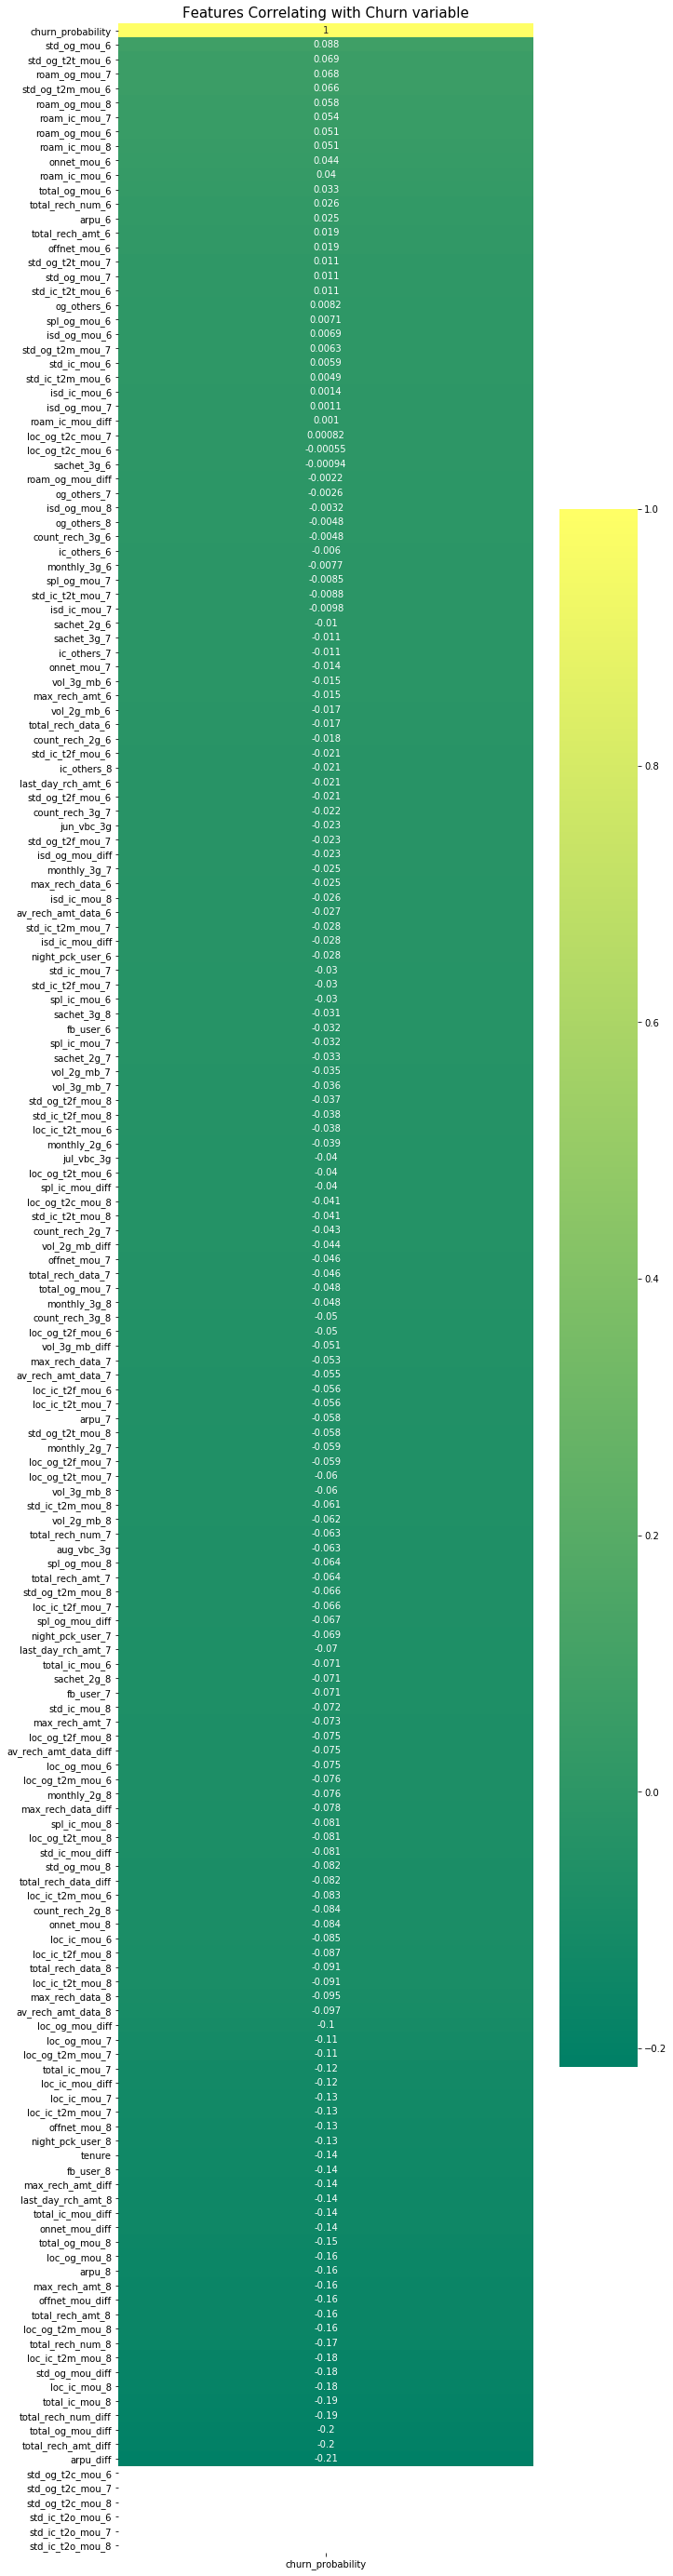

In [398]:
# Checking Correlation between target variable(churn_probability) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(df.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

#### Observation

Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn.

Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

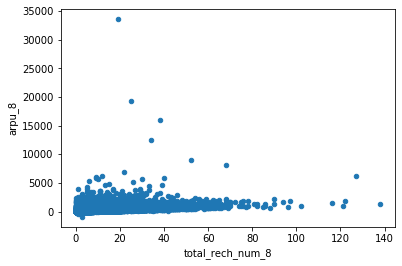

In [399]:
df[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')
plt.show()

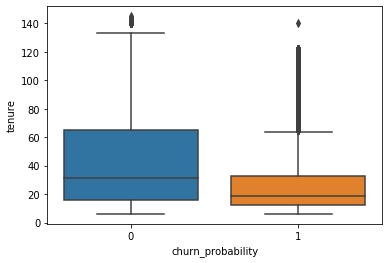

In [400]:
sns.boxplot(x = df.churn_probability, y = df.tenure)
plt.show()

#### Observation

Tenured customers do no churn and they keep availing telecom services

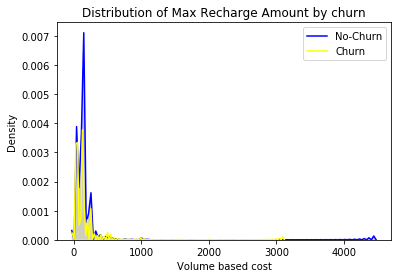

In [401]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(df.max_rech_amt_8[(df["churn_probability"] == 0)],
                color="Blue", shade = True)
ax = sns.kdeplot(df.max_rech_amt_8[(df["churn_probability"] == 1)],
                ax =ax, color="Yellow", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

#### Observation
No churn customers usually recharge more compared to churn customers

In [402]:
pd.crosstab(df.churn_probability, df.sachet_3g_8)

sachet_3g_8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,29,30,38,41
churn_probability,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,60016,1904,428,180,90,75,35,31,23,16,13,9,10,8,3,5,3,2,3,1,3,2,2,1,1,1,1,1
1,7043,65,7,9,3,1,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [403]:
pd.crosstab(df.churn_probability, df.total_rech_data_8)

total_rech_data_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,32.0,33.0,34.0,37.0,38.0,39.0,40.0,42.0,44.0,46.0,49.0,50.0,55.0,60.0
churn_probability,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,45070,8919,3524,1516,1074,698,536,359,285,191,171,135,105,62,49,28,29,24,18,11,7,3,8,5,3,4,5,2,1,4,3,1,1,1,1,1,1,2,2,2,2,1,1,1,1
1,6512,389,115,43,36,8,9,6,4,4,2,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### churn_probability is the target column

In [404]:
num_cols.remove('churn_probability')
num_cols.remove('tenure') #As we are dropping this off

In [405]:
#As we already have column tenure range
df.drop('tenure',axis=1, inplace=True)

## Outlier Treatment for the Numerical Columns

In [406]:
def outlier_treatment(df,colName):
    IQR = df[colName].quantile(0.75)-df[colName].quantile(0.25)
    UF = df[colName].quantile(0.75) + (1.5*IQR)
    LF = df[colName].quantile(0.25) - (1.5*IQR)
    df.loc[df[colName] > UF,colName]=UF
    df.loc[df[colName] < LF,colName]=LF

In [407]:
count = 0
for col in num_cols:
    if df[col].value_counts().max() > 30 :
        print("Outlier Treatment done : " + col)
        count = count+1
        outlier_treatment(df,col)
print("Total Columns treated for Outliers : {}".format(count))

Outlier Treatment done : arpu_6
Outlier Treatment done : arpu_7
Outlier Treatment done : arpu_8
Outlier Treatment done : onnet_mou_6
Outlier Treatment done : onnet_mou_7
Outlier Treatment done : onnet_mou_8
Outlier Treatment done : offnet_mou_6
Outlier Treatment done : offnet_mou_7
Outlier Treatment done : offnet_mou_8
Outlier Treatment done : roam_ic_mou_6
Outlier Treatment done : roam_ic_mou_7
Outlier Treatment done : roam_ic_mou_8
Outlier Treatment done : roam_og_mou_6
Outlier Treatment done : roam_og_mou_7
Outlier Treatment done : roam_og_mou_8
Outlier Treatment done : loc_og_t2t_mou_6
Outlier Treatment done : loc_og_t2t_mou_7
Outlier Treatment done : loc_og_t2t_mou_8
Outlier Treatment done : loc_og_t2m_mou_6
Outlier Treatment done : loc_og_t2m_mou_7
Outlier Treatment done : loc_og_t2m_mou_8
Outlier Treatment done : loc_og_t2f_mou_6
Outlier Treatment done : loc_og_t2f_mou_7
Outlier Treatment done : loc_og_t2f_mou_8
Outlier Treatment done : loc_og_t2c_mou_6
Outlier Treatment done : 

### Box Plots for the Numerical Columns

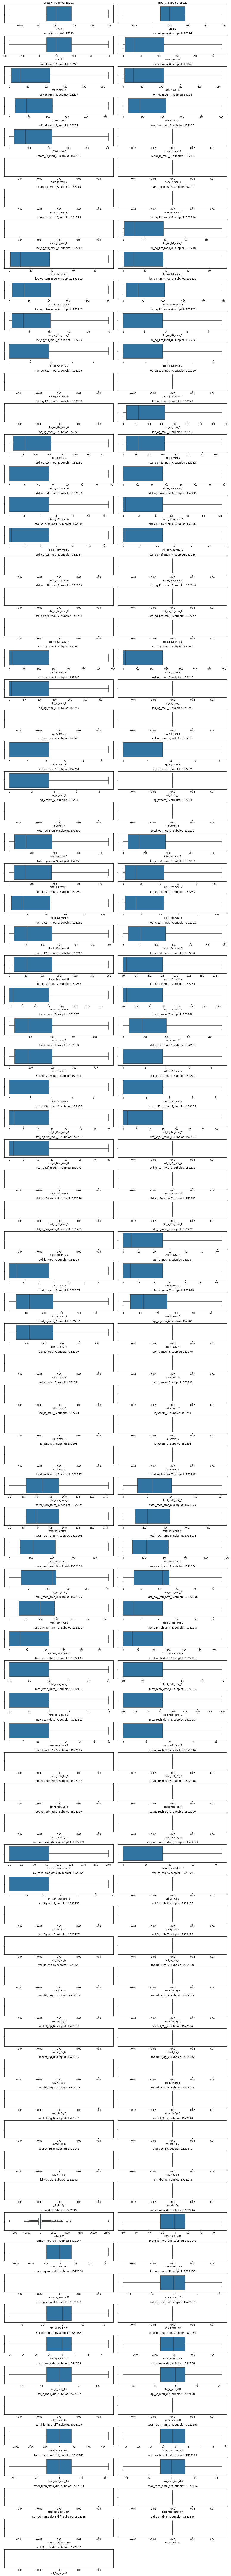

In [408]:
a = 152
b = 2
c = 1
fig = plt.figure(figsize=(15, 300))
fig.set_size_inches(15, 300)
for i in num_cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(df[i])
    c = c + 1
    plt.tight_layout()
plt.show();

In [409]:
df = pd.get_dummies(data=df,columns=['tenure_range'],drop_first=True)

## Splitting Data into Train and Validation Sets

In [410]:
X = df.drop(['churn_probability'], axis=1)
y = df['churn_probability']

X_train = df.drop(['churn_probability'], axis=1)
y_train = df['churn_probability']

## Standard Scaler

In [411]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)

## PCA

In [412]:
pca = PCA(random_state=100)
X_train_pca=pca.fit_transform(X_train)

In [413]:
#variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       20.98
1       32.65
2       42.69
3       51.63
4       55.97
5       59.31
6       61.98
7       64.25
8       66.34
9       68.25
10      70.00
11      71.64
12      73.10
13      74.52
14      75.89
15      77.23
16      78.53
17      79.78
18      80.97
19      82.13
20      83.18
21      84.15
22      85.00
23      85.83
24      86.63
25      87.37
26      88.08
27      88.77
28      89.29
29      89.80
30      90.28
31      90.73
32      91.18
33      91.62
34      92.04
35      92.42
36      92.79
37      93.15
38      93.48
39      93.79
40      94.09
41      94.38
42      94.65
43      94.91
44      95.16
45      95.40
46      95.63
47      95.86
48      96.07
49      96.28
50      96.48
51      96.67
52      96.86
53      97.03
54      97.19
55      97.35
56      97.50
57      97.64
58      97.77
59      97.90
60      98.02
61      98.13
62      98.23
63      98.33
64      98.43
65      98.53
66      98.62
67      98.71
68      98.79
69      98.87
70      98.95
71    

90% variance is explained by 29 components.

95% variance is explained by 43 components.

100% variance is explained by 101 components.

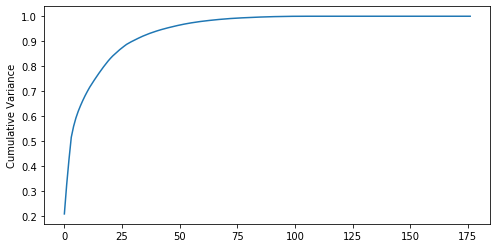

In [414]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[8,4])
plt.plot(var_cumu)
plt.ylabel("Cumulative Variance")
plt.show()

In [415]:
pca_final = IncrementalPCA(n_components=43)
X_train_pca = pca_final.fit_transform(X_train)

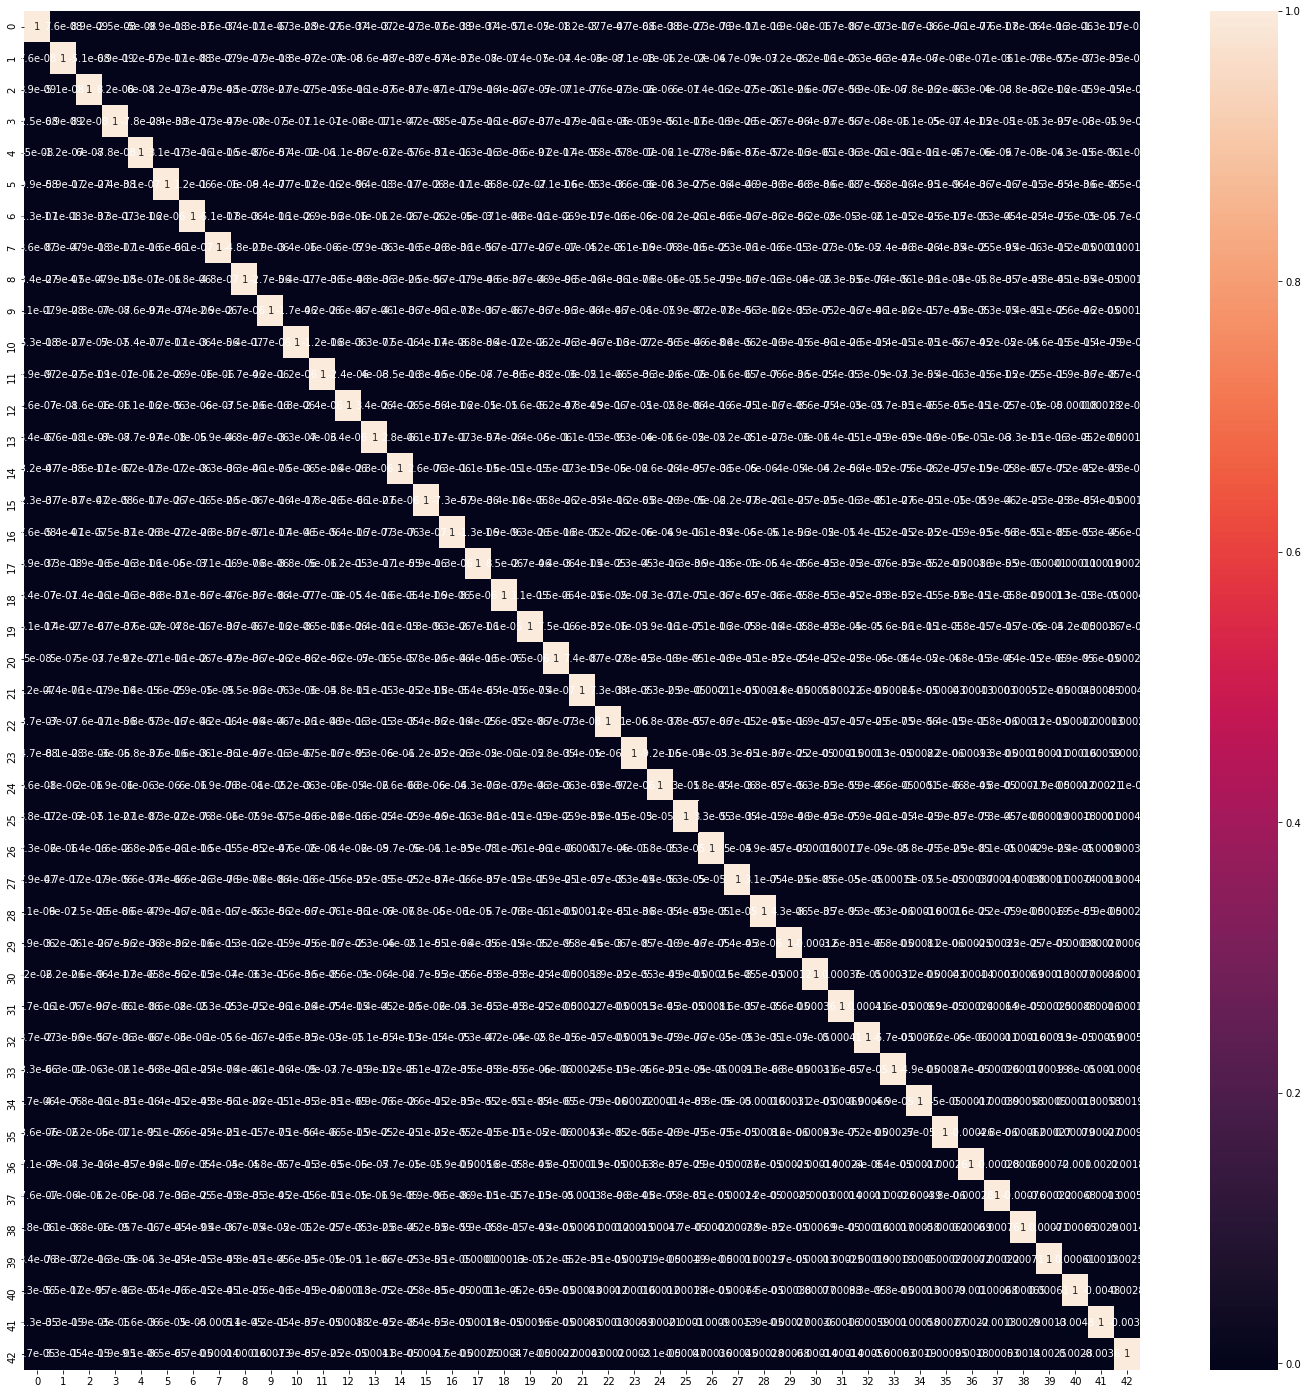

In [416]:
corrmat = np.corrcoef(X_train_pca.transpose())
plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True)

In [417]:
def evaluationMetrics(X,y,model):
    pred_probs = model.predict_proba(X)[:,1]
    preds=model.predict(X)

    print(classification_report(y, preds))

    confusion = metrics.confusion_matrix(y, preds)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy = metrics.accuracy_score(y, preds)
    f1 = metrics.f1_score(y, preds)
    precision = metrics.precision_score(y, preds)
    recall = metrics.recall_score(y, preds)
    roc_auc = metrics.roc_auc_score(y, preds)
    
    print("Recall : {:.1%}".format(recall))
    print("Precision : {:.1%}".format(precision))
    print("F1-Score : {:.1%}".format(f1))
    print("Accuracy : {:.1%}".format(accuracy))
    print("ROC_AUC : {:.1%}".format(roc_auc))
    
    plot_roc_curve(model, X, y)
    plt.show()

In [418]:
def PreProcess_TestData(isScale):
    df_test=pd.read_csv('test.csv')

    ID = df_test.pop('id')

    colList = list(df.columns)
    colList.remove('churn_probability')

    df_test[rechCols] = df_test[rechCols].apply(lambda x: x.fillna(0))
    df_test[cat_cols] = df_test[cat_cols].apply(lambda x: x.fillna(-1))
    df_test.fillna(value=0,inplace=True)

    df_test['arpu_diff'] = df_test.arpu_8 - ((df_test.arpu_6 + df_test.arpu_7)/2)
    df_test['onnet_mou_diff'] = df_test.onnet_mou_8 - ((df_test.onnet_mou_6 + df_test.onnet_mou_7)/2)
    df_test['offnet_mou_diff'] = df_test.offnet_mou_8 - ((df_test.offnet_mou_6 + df_test.offnet_mou_7)/2)
    df_test['roam_ic_mou_diff'] = df_test.roam_ic_mou_8 - ((df_test.roam_ic_mou_6 + df_test.roam_ic_mou_7)/2)
    df_test['roam_og_mou_diff'] = df_test.roam_og_mou_8 - ((df_test.roam_og_mou_6 + df_test.roam_og_mou_7)/2)
    df_test['loc_og_mou_diff'] = df_test.loc_og_mou_8 - ((df_test.loc_og_mou_6 + df_test.loc_og_mou_7)/2)
    df_test['std_og_mou_diff'] = df_test.std_og_mou_8 - ((df_test.std_og_mou_6 + df_test.std_og_mou_7)/2)
    df_test['isd_og_mou_diff'] = df_test.isd_og_mou_8 - ((df_test.isd_og_mou_6 + df_test.isd_og_mou_7)/2)
    df_test['spl_og_mou_diff'] = df_test.spl_og_mou_8 - ((df_test.spl_og_mou_6 + df_test.spl_og_mou_7)/2)
    df_test['total_og_mou_diff'] = df_test.total_og_mou_8 - ((df_test.total_og_mou_6 + df_test.total_og_mou_7)/2)
    df_test['loc_ic_mou_diff'] = df_test.loc_ic_mou_8 - ((df_test.loc_ic_mou_6 + df_test.loc_ic_mou_7)/2)
    df_test['std_ic_mou_diff'] = df_test.std_ic_mou_8 - ((df_test.std_ic_mou_6 + df_test.std_ic_mou_7)/2)
    df_test['isd_ic_mou_diff'] = df_test.isd_ic_mou_8 - ((df_test.isd_ic_mou_6 + df_test.isd_ic_mou_7)/2)
    df_test['spl_ic_mou_diff'] = df_test.spl_ic_mou_8 - ((df_test.spl_ic_mou_6 + df_test.spl_ic_mou_7)/2)
    df_test['total_ic_mou_diff'] = df_test.total_ic_mou_8 - ((df_test.total_ic_mou_6 + df_test.total_ic_mou_7)/2)
    df_test['total_rech_num_diff'] = df_test.total_rech_num_8 - ((df_test.total_rech_num_6 + df_test.total_rech_num_7)/2)
    df_test['total_rech_amt_diff'] = df_test.total_rech_amt_8 - ((df_test.total_rech_amt_6 + df_test.total_rech_amt_7)/2)
    df_test['max_rech_amt_diff'] = df_test.max_rech_amt_8 - ((df_test.max_rech_amt_6 + df_test.max_rech_amt_7)/2)
    df_test['total_rech_data_diff'] = df_test.total_rech_data_8 - ((df_test.total_rech_data_6 + df_test.total_rech_data_7)/2)
    df_test['max_rech_data_diff'] = df_test.max_rech_data_8 - ((df_test.max_rech_data_6 + df_test.max_rech_data_7)/2)
    df_test['av_rech_amt_data_diff'] = df_test.av_rech_amt_data_8 - ((df_test.av_rech_amt_data_6 + df_test.av_rech_amt_data_7)/2)
    df_test['vol_2g_mb_diff'] = df_test.vol_2g_mb_8 - ((df_test.vol_2g_mb_6 + df_test.vol_2g_mb_7)/2)
    df_test['vol_3g_mb_diff'] = df_test.vol_3g_mb_8 - ((df_test.vol_3g_mb_6 + df_test.vol_3g_mb_7)/2)
    
    df_test['tenure'] = (df_test['aon']/30).round(0)
    df_test['tenure_range'] = pd.cut(df_test['tenure'], tn_range, labels=tn_label)
    
    df_test = pd.get_dummies(data=df_test,columns=['tenure_range'],drop_first=True)
    
    df_test=df_test[colList]

    
    for col in num_cols:
        outlier_treatment(df_test,col)
    
    if isScale == True:
        df_test = scaler.transform(df_test)
    
    return df_test


df_test=pd.read_csv('test.csv')
ID = df_test.pop('id')

In [419]:
def PredictUnseenTestData(model,opFileName,isPCA,isScale):
    df_test = PreProcess_TestData(isScale)
    if isPCA == True:
        df_test_pca = pca_final.transform(df_test)
        pred_test = model.predict(df_test_pca)
    else:
        pred_test = model.predict(df_test)

    output = pd.DataFrame({'id': ID.astype(int), 'churn_probability': pred_test})
    output.to_csv(opFileName, index=False)

### *** Class Imbalance handled using class weights

## Logistic Regression With PCA

In [435]:
log_pca = LogisticRegression()

weights = np.linspace(0.0,0.50,50)
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights],
              'solver':['newton-cg', 'lbfgs'],
              'penalty':['l2'],
              'C':[1.0, 0.1, 0.01,0.001]}

gridsearch_log = GridSearchCV(estimator= log_pca, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=100),
                          n_jobs=-1,
                          scoring = 'f1',
                          verbose=2).fit(X_train_pca, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  3.8min finished


In [436]:
print('\n Best estimator:')
print(gridsearch_log.best_estimator_)

print('\n Best hyperparameters:')
print(gridsearch_log.best_params_)


 Best estimator:
LogisticRegression(C=0.01,
                   class_weight={0: 0.31632653061224486, 1: 0.6836734693877551},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

 Best hyperparameters:
{'C': 0.01, 'class_weight': {0: 0.31632653061224486, 1: 0.6836734693877551}, 'penalty': 'l2', 'solver': 'newton-cg'}


In [437]:
log_pca_best = gridsearch_log.best_estimator_
model_pca_logistic = log_pca_best.fit(X_train_pca, y_train)

#### Evaluation - Logistic Regression with PCA

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     62867
           1       0.59      0.65      0.62      7132

    accuracy                           0.92     69999
   macro avg       0.77      0.80      0.79     69999
weighted avg       0.92      0.92      0.92     69999

Recall : 64.8%
Precision : 59.0%
F1-Score : 61.8%
Accuracy : 91.8%
ROC_AUC : 79.8%


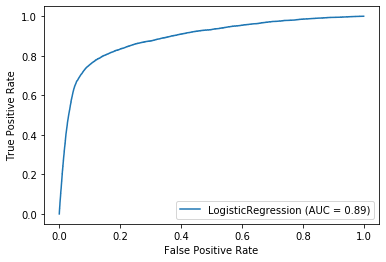

In [438]:
evaluationMetrics(X_train_pca,y_train,model_pca_logistic)

#### Prediction of test data for Logistic with PCA

In [439]:
PredictUnseenTestData(log_pca_best,'pred_log_withPCA.csv',True,True)

## Tree - Random Forest With PCA

In [453]:
weights = np.linspace(0.0,0.50,10)

random_grid={
 'max_depth': [20, 30, 40, None],
 'max_features': ['auto'],
 'min_samples_leaf': [4, 6, 10],
 'min_samples_split': [10, 20, 30],
 'n_estimators': [150, 200, 300],
 'criterion':['entropy'],
 'class_weight': [{0:x, 1:1.0-x} for x in weights]}

In [454]:
rf_pca = RandomForestClassifier(random_state=100)

rand_search_rf_pca = RandomizedSearchCV(estimator=rf_pca,
                           param_distributions=random_grid,
                           cv = 3,
                           n_iter = 15,
                           n_jobs=-1, verbose=2, random_state=100,scoring='recall')

rand_search_rf_pca.fit(X_train_pca, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 28.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [455]:
print('\n Best estimator:')
print(rand_search_rf_pca.best_estimator_)

print('\n Best hyperparameters:')
print(rand_search_rf_pca.best_params_)


 Best estimator:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1111111111111111,
                                     1: 0.8888888888888888},
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

 Best hyperparameters:
{'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy', 'class_weight': {0: 0.1111111111111111, 1: 0.8888888888888888}}


In [456]:
rf_pca_best = rand_search_rf_pca.best_estimator_
rf_pca_best.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1111111111111111,
                                     1: 0.8888888888888888},
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

#### Evaluation - Random Forest with PCA

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     62867
           1       0.73      0.94      0.82      7132

    accuracy                           0.96     69999
   macro avg       0.86      0.95      0.90     69999
weighted avg       0.97      0.96      0.96     69999

Recall : 93.7%
Precision : 73.0%
F1-Score : 82.1%
Accuracy : 95.8%
ROC_AUC : 94.9%


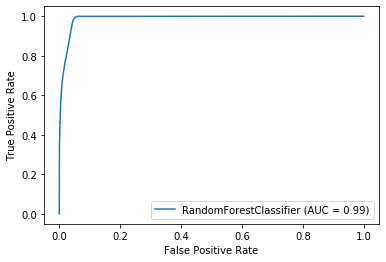

In [457]:
evaluationMetrics(X_train_pca,y_train,rf_pca_best)

#### Prediction of test data for Random Forest with PCA

In [459]:
PredictUnseenTestData(rf_pca_best,'predictions_rf_withPCA.csv',True,True)

#### Inference

The above model rf_pca_best has been considered as the final model, as we get good recall of ~94% and F1 Score of 81.2%.

Also the difference between train and test accuracy is ~3% which is with in the acceptable range.

Test Accuracy - 92.8%(from Kaggle, 3% difference from train accuracy)

## Boosting - XGBoost with PCA

In [447]:
xgb_pca = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

weights = np.linspace(0.0,0.50,10)
params = {
        'n_estimators' : [100, 200, 300],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12],
        'class_weight': [{0:x, 1:1.0-x} for x in weights]
        }

folds = 3
param_comb = 15

rand_search_xgb_pca = RandomizedSearchCV(xgb_pca, param_distributions=params,
                                   n_iter=param_comb,
                                   scoring='recall',
                                   n_jobs=-1, cv=folds, verbose=3, random_state=100).fit(X_train_pca, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 15.8min finished


[19:03:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:03:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [448]:
print('\n Best estimator:')
print(rand_search_xgb_pca.best_estimator_)

print('\n Best hyperparameters:')
print(rand_search_xgb_pca.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree',
              class_weight={0: 0.1111111111111111, 1: 0.8888888888888888},
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, ...)

 Best hyperparameters:
{'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 1.0, 'class_weight': {0: 0.1111111111111111

In [449]:
xgb_pca_best=rand_search_xgb_pca.best_estimator_
xgb_pca_best = xgb_pca_best.fit(X_train_pca, y_train)

[19:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### Evaluation - XGBoost with PCA

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     62867
           1       0.76      0.61      0.68      7132

    accuracy                           0.94     69999
   macro avg       0.86      0.79      0.82     69999
weighted avg       0.94      0.94      0.94     69999

Recall : 60.5%
Precision : 76.5%
F1-Score : 67.6%
Accuracy : 94.1%
ROC_AUC : 79.2%


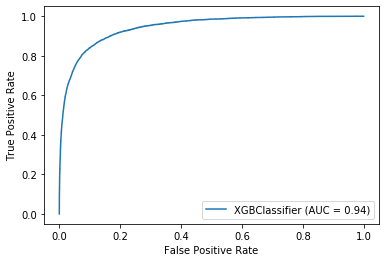

In [450]:
evaluationMetrics(X_train_pca,y_train,xgb_pca_best)

#### Prediction of test data for XGBoost with PCA

In [451]:
PredictUnseenTestData(xgb_pca_best,'predictions_xgb_withPCA.csv',True,True)

## Model to find Feature Importance

In [460]:
rf = RandomForestClassifier(random_state=100, n_jobs=-1)

In [461]:
weights = np.linspace(0.0,0.50,10)

random_grid={
 'max_depth': [ 40, None],
 'max_features': ['auto'],
 'min_samples_leaf': [6, 10, 20],
 'min_samples_split': [10, 20, 30],
 'n_estimators': [200, 300, 400],
 'criterion':['entropy'],
 'class_weight': [{0:x, 1:1.0-x} for x in weights]}

rand_search_rf = RandomizedSearchCV(estimator=rf,
                           param_distributions=random_grid,
                           n_iter = 15,
                           cv=3,
                           n_jobs=-1,
                           verbose=1,
                           scoring="f1",random_state=100).fit(X,y)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 15.0min finished


In [462]:
print('\n Best estimator:')
print(rand_search_rf.best_estimator_)

print('\n Best hyperparameters:')
print(rand_search_rf.best_params_)


 Best estimator:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.16666666666666666,
                                     1: 0.8333333333333334},
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=100, verbose=0,
                       warm_start=False)

 Best hyperparameters:
{'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy', 'class_weight': {0: 0.16666666666666666, 1: 0.8333333333333334}}


In [463]:
rf_best = rand_search_rf.best_estimator_
rf_best = rf_best.fit(X, y)

#### Evaluation - Random Forest without PCA

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     62867
           1       0.78      0.83      0.80      7132

    accuracy                           0.96     69999
   macro avg       0.88      0.90      0.89     69999
weighted avg       0.96      0.96      0.96     69999

Recall : 83.1%
Precision : 77.8%
F1-Score : 80.4%
Accuracy : 95.9%
ROC_AUC : 90.2%


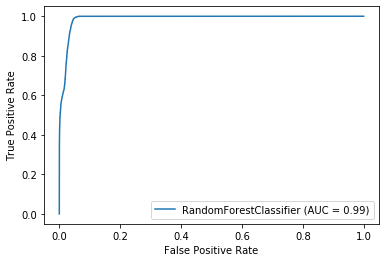

In [464]:
evaluationMetrics(X,y,rf_best)

#### Prediction of test data for Random Forest without PCA

In [465]:
PredictUnseenTestData(rf_best,'pred_rf_withoutPCA.csv',False,False)

### Finding out Important Features

In [478]:
imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Imp in %": 100*rf_best.feature_importances_
})

imp_df.sort_values(by="Imp in %", ascending=False, inplace=True)

In [479]:
imp_df.head(30)

,Varname,Imp in %
68,loc_ic_mou_8,6.876745
86,total_ic_mou_8,6.105944
62,loc_ic_t2m_mou_8,5.925164
20,loc_og_t2m_mou_8,5.012549
59,loc_ic_t2t_mou_8,4.974954
29,loc_og_mou_8,4.771236
56,total_og_mou_8,3.336037
8,offnet_mou_8,2.718604
107,last_day_rch_amt_8,2.695783
17,loc_og_t2t_mou_8,2.355731


## Final Inference

### Final Model - Random Forest with PCA

The final model selected is Random Forest with PCA.

The above model rf_pca_best has been considered as the final model, as we get good recall of ~94% and F1 Score of 81.2%.

Also the difference between train and test accuracy is ~3% which is with in the acceptable range.

Test Accuracy - 92.8%(from Kaggle, 3% difference from train accuracy)


### Evaluation Metrics

The model should have high accuracy to predict correctly the churn, at the same time, metrics recall and f1-score have been considered as high recall would help in predicting the customers likely to churn and f1 score is a balance of recall and precision. So, the model has been built by taking these points into consideration.


### Business Strategies Recommended

Tenured customers have lower probabilities to churn out, so special attention(offers) should be given to customers who have recently joined the network(1 year).

The mou(minutes of usage) ic and og indicate the likeliness to churn, as the customers tend to churn who have low mou.

The customers who have shown a reduced recharge amount also tend to churn. So special offers should be provided to such customers.